In [1]:
from dataclasses import asdict

import networkx as nx

from src.vertex_params import VertexType, VertexParams
from src.productions.production5 import Production5
from src.visualization import draw

In [2]:
def mk_vertex(t, pos, level):
    return asdict(VertexParams(vertex_type=t, position=pos, level=level))

In [3]:
p5 = Production5()

In [4]:
def _get_node(nr: int, vertex_type: VertexType, position: tuple[float, float], level: int):
    return (
               nr,
               asdict(
                   VertexParams(vertex_type=vertex_type, position=position, level=level)
               ),
           )

In [5]:
graph = nx.Graph()
graph.add_nodes_from([
    _get_node(0, vertex_type=VertexType.EXTERIOR, position=(0.0, 0.0), level=1),
    _get_node(1, vertex_type=VertexType.EXTERIOR, position=(0.0, 0.5), level=1),
    _get_node(2, vertex_type=VertexType.EXTERIOR, position=(0.0, 1.0), level=1),
    _get_node(3, vertex_type=VertexType.EXTERIOR, position=(0.5, 1.0), level=1),
    _get_node(4, vertex_type=VertexType.EXTERIOR, position=(1.0, 1.0), level=1),
    _get_node(5, vertex_type=VertexType.EXTERIOR, position=(0.5, 0.5), level=1),
    _get_node(6, vertex_type=VertexType.INTERIOR, position=(1/3, 2/3), level=1)
])

graph.add_edges_from([
    (0, 1),
    (1, 2),
    (2, 3),
    (3, 4),
    (4, 5),
    (5, 0),

    (6, 0),
    (6, 2),
    (6, 4)
])

In [6]:
isomorphic_subgraph1 = p5.find_isomorphic_to_left_side(graph)

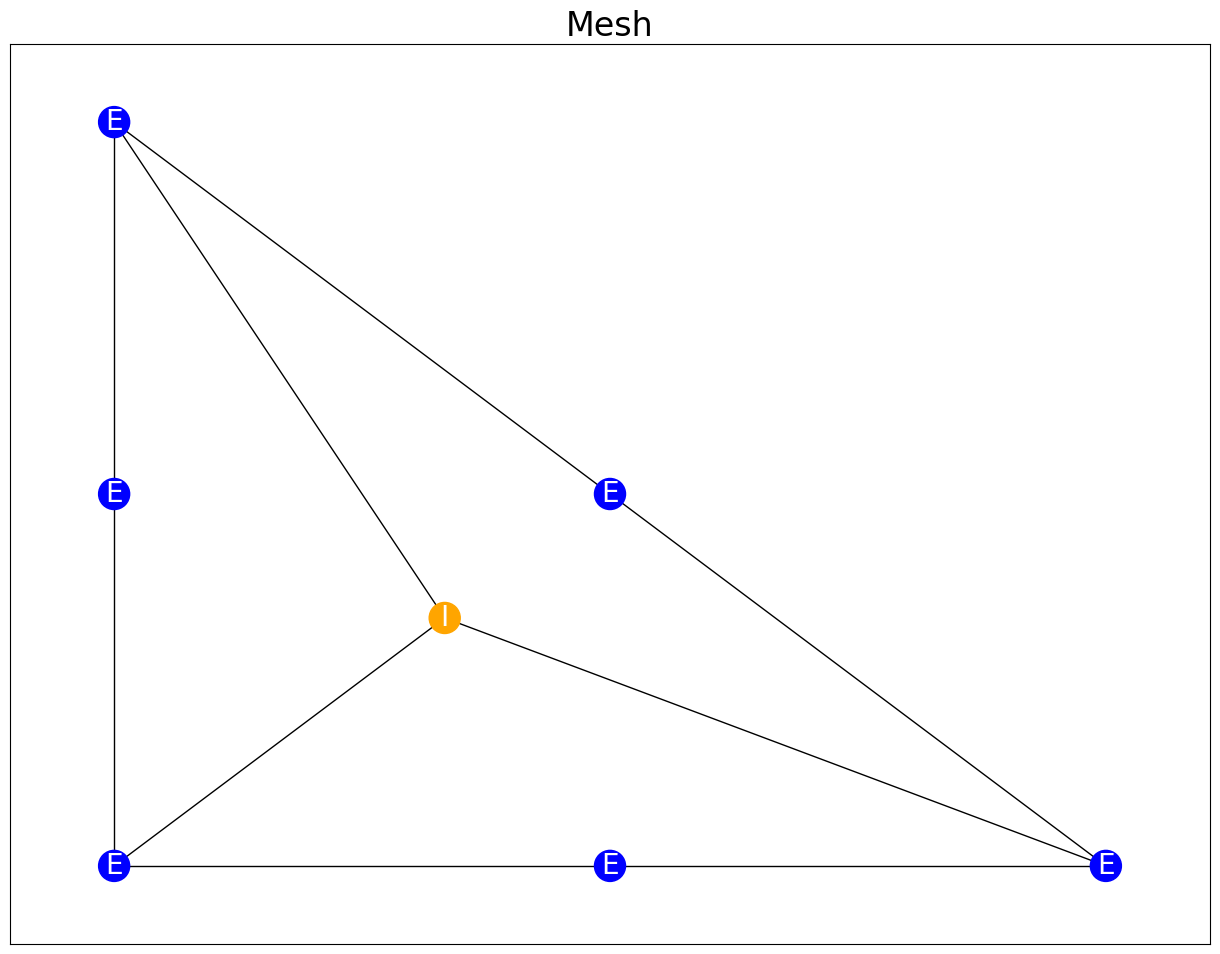

In [7]:
draw(isomorphic_subgraph1, figsize=(12, 9))

In [8]:
after_p5 = p5.apply(graph, isomorphic_subgraph1)

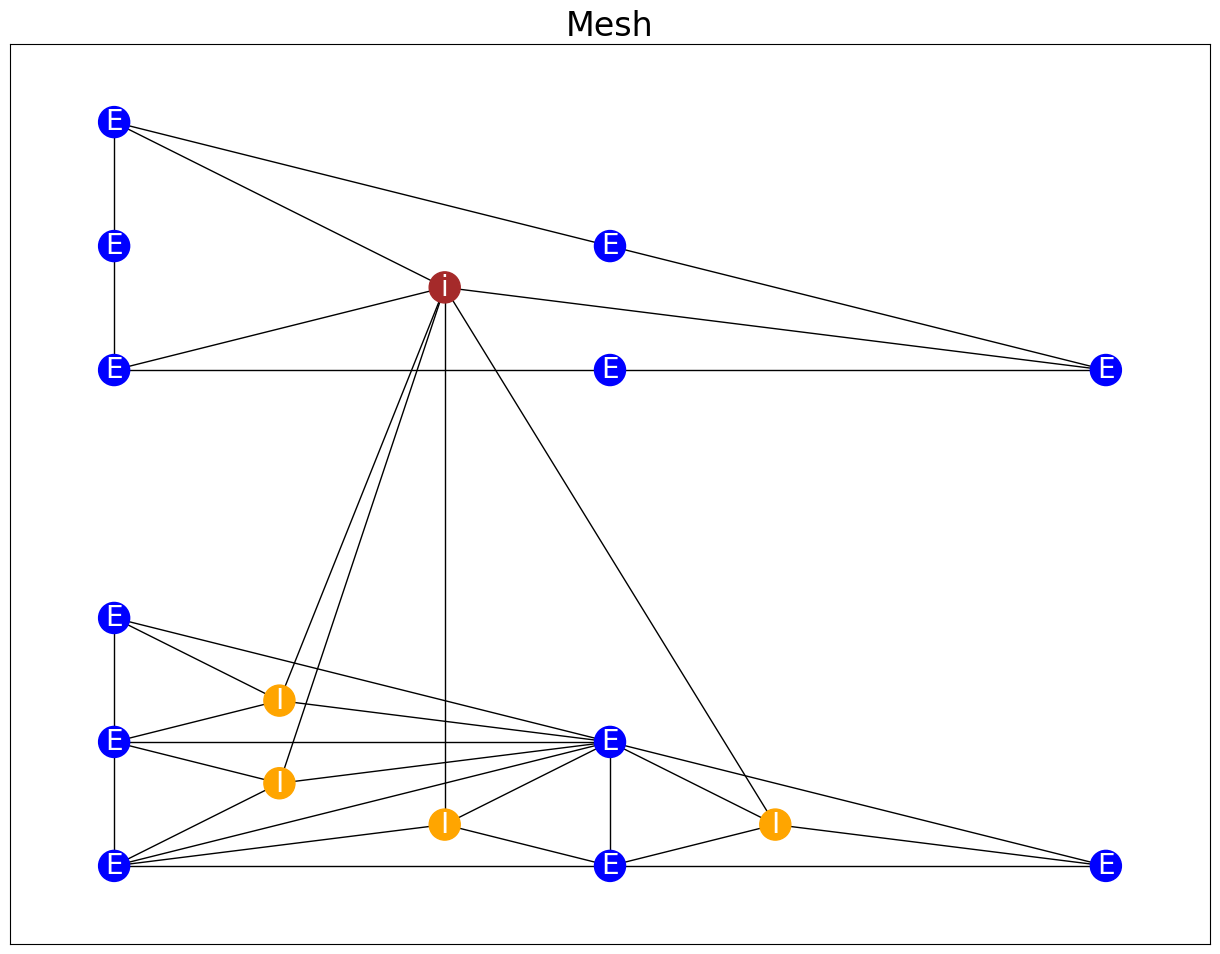

In [9]:
draw(after_p5, figsize=(12, 9))

<h1>TESTS</h1>

In [10]:
import dataclasses
from typing import Any
from src.prod5_data import get_expected_right_side, get_correct_left_side
import networkx as nx
from src.vertex_params import VertexType, VertexParams
from src.productions.production5 import Production5
from src.visualization import draw

p5 = Production5()

def _get_node(nr: int, vertex_type: VertexType, position: tuple[float, float], level: int) -> tuple[
    int, dict[str, Any]]:
    return (
               nr,
               dataclasses.asdict(
                   VertexParams(vertex_type=vertex_type, position=position, level=level)
               ),
           )

def _are_nodes_equal(node1, node2) -> bool:
    return VertexParams(**node1) == VertexParams(**node2)

def _are_graphs_isomorphic(graph1: nx.Graph, graph2: nx.Graph) -> bool:
    return nx.is_isomorphic(
        graph1,
        graph2,
        node_match=_are_nodes_equal
    )

<h2>1. correct graph</h2>

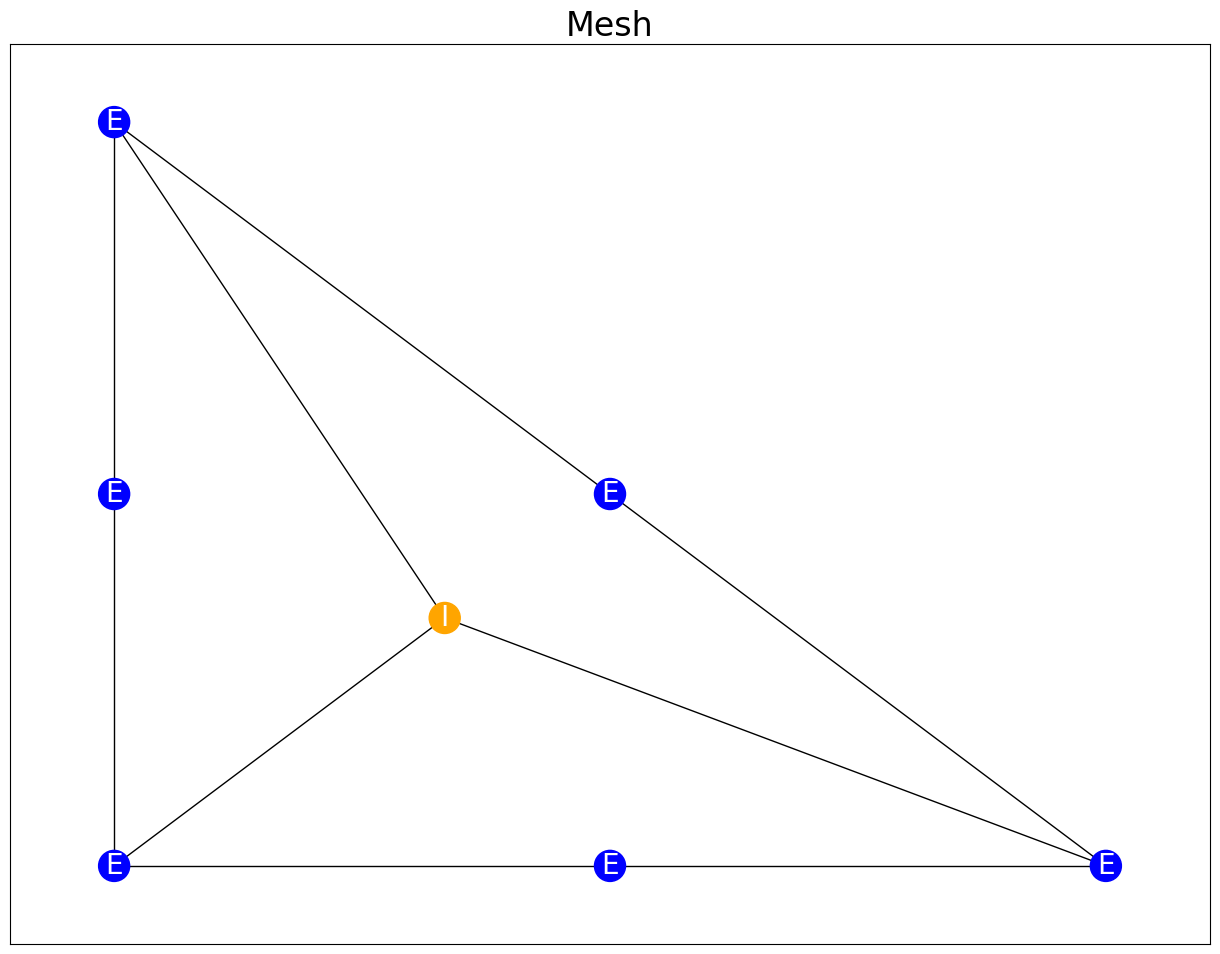

In [11]:
test_graph = get_correct_left_side()
draw(test_graph, figsize=(12, 9))

In [12]:
isomorphic_subgraph = p5.find_isomorphic_to_left_side(test_graph)
result = p5.apply(test_graph, isomorphic_subgraph)
expectedGraph = get_expected_right_side()
print(_are_graphs_isomorphic(expectedGraph, result))

True


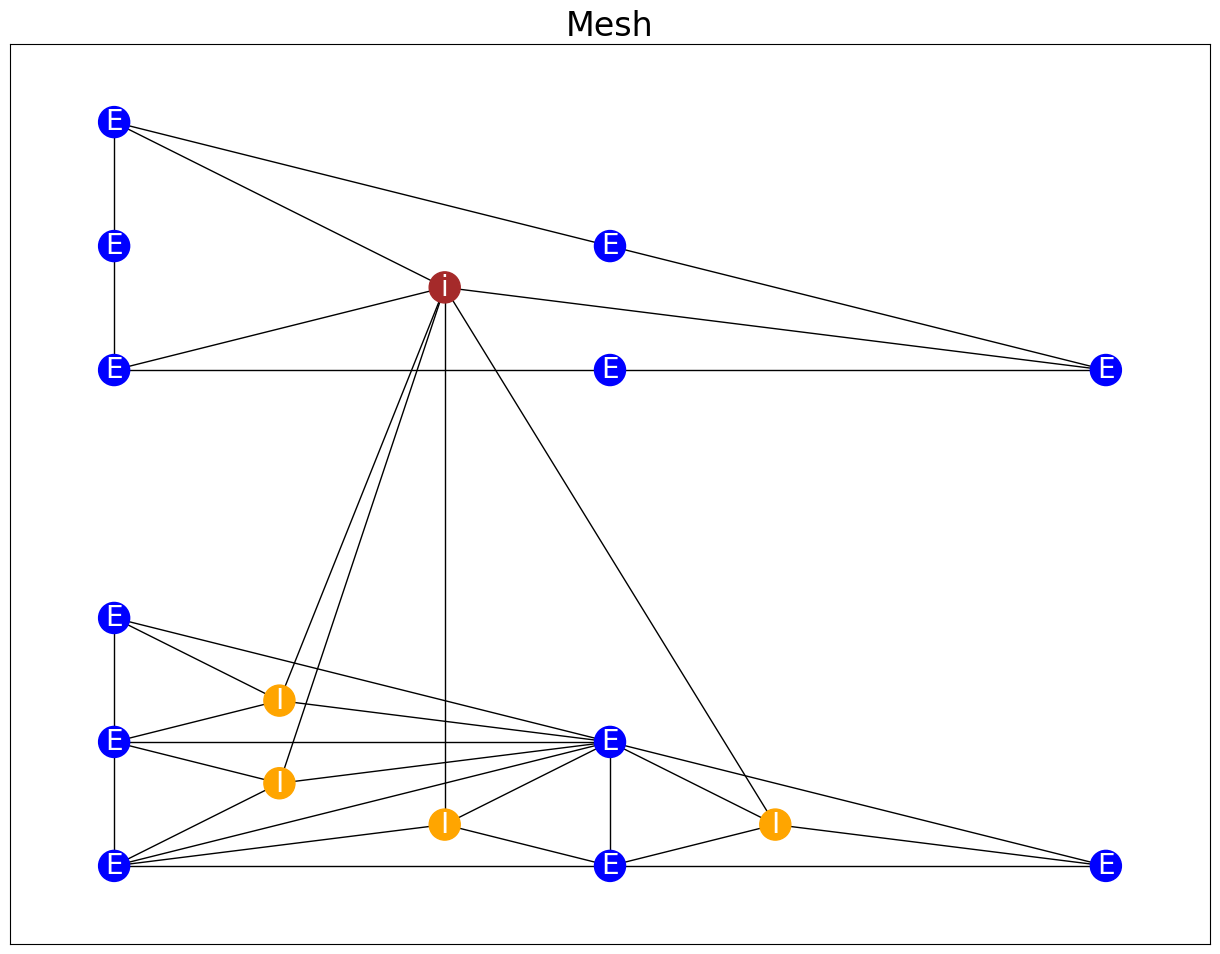

In [13]:
draw(result, figsize=(12, 9))

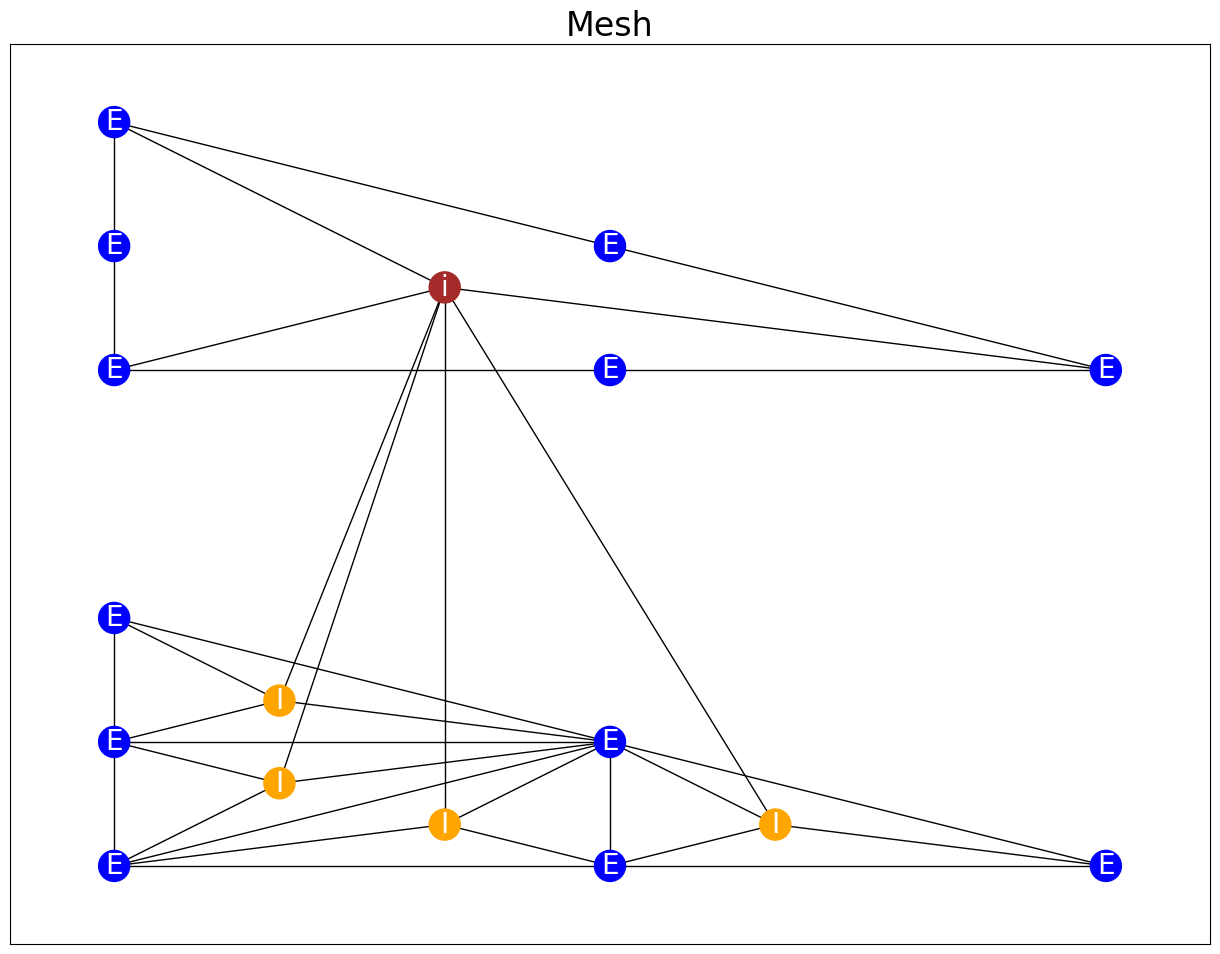

In [14]:
draw(expectedGraph, figsize=(12, 9))

<h2>2. removed edge</h2>

In [15]:
test_graph = get_correct_left_side()
test_graph.remove_edge(0, 1)
subgraph = p5.find_isomorphic_to_left_side(test_graph)
print(subgraph)

None


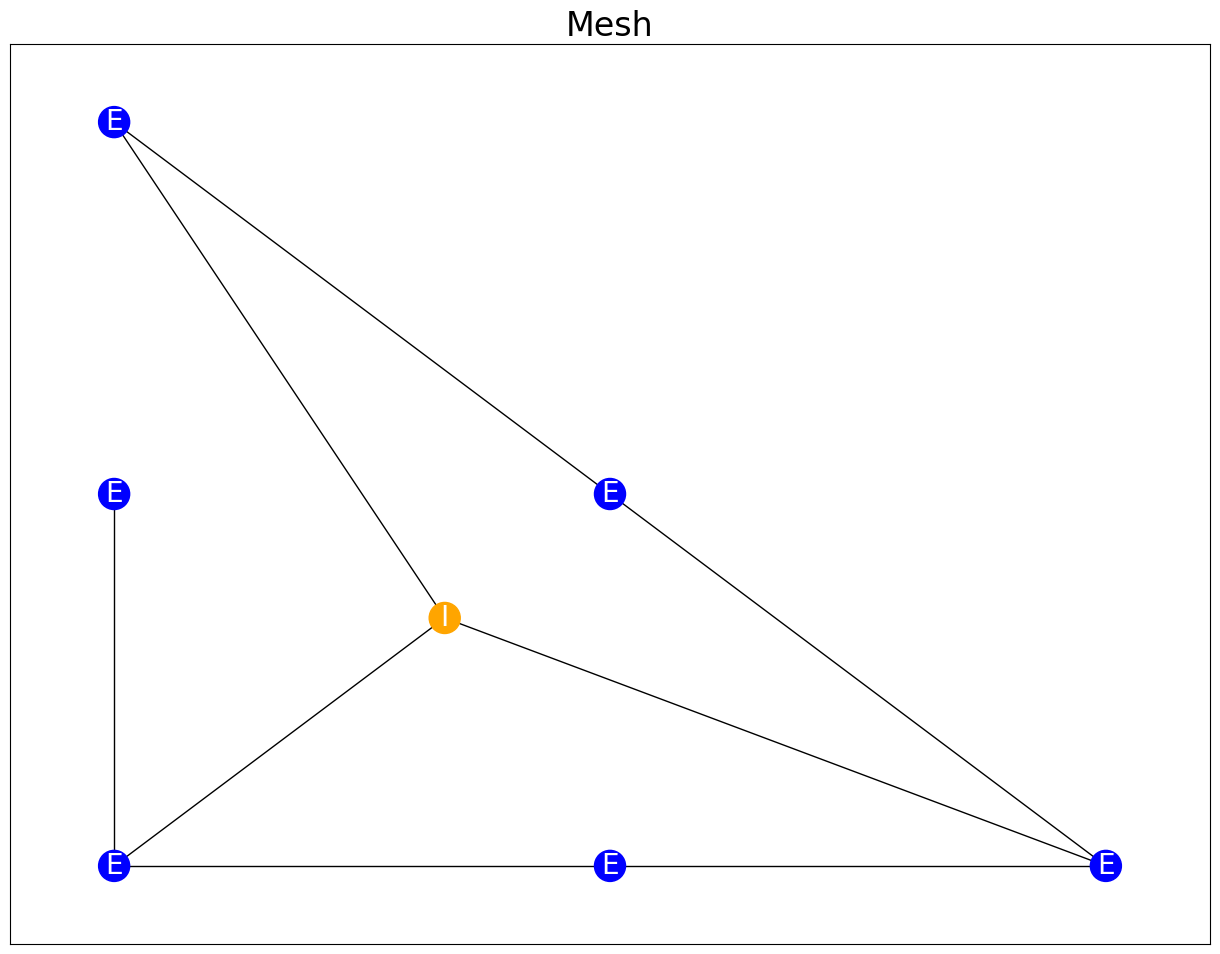

In [16]:
draw(test_graph, figsize=(12, 9))

<h2>3. wrong position</h2>

In [17]:
test_graph = get_correct_left_side()
test_graph.nodes[3]['position'] = (0.5, 1.5)
subgraph = p5.find_isomorphic_to_left_side(test_graph)
print(subgraph)

None


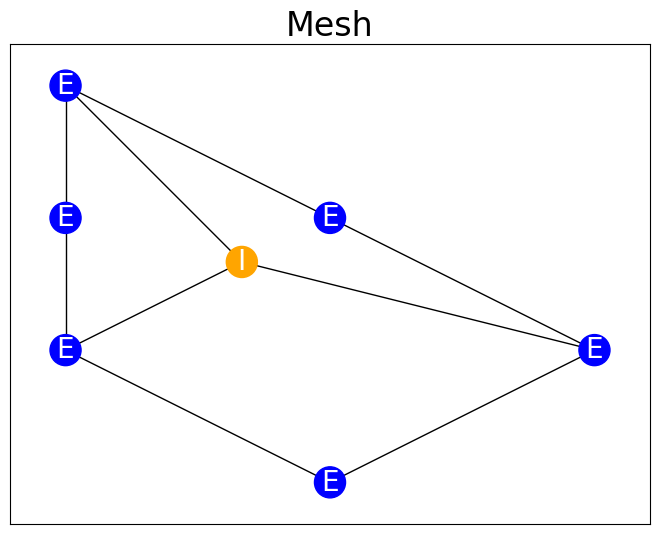

In [18]:
draw(test_graph)